In [27]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from simulation import run_interferom_simulation, dist_to_state

from numeric_truncated_unitaries import numeric_truncated_unitary
from direct_decomposition import compile_unitary, knit_qiskit_circuits, random_unitary, direct_decomposition
from random import random
from qiskit.quantum_info import Operator

In [28]:
theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()
theta_2 = np.pi/2 * random()
phi_2 = np.pi * random()
theta_3 = np.pi/2 * random()
phi_3 = np.pi * random()

[
 Beam splitter between modes 1 and 2: 
 Theta angle: 0.74 
 Phase: 3.14, 
 Beam splitter between modes 2 and 3: 
 Theta angle: 0.46 
 Phase: 1.11, 
 Beam splitter between modes 1 and 2: 
 Theta angle: 1.31 
 Phase: 1.20]


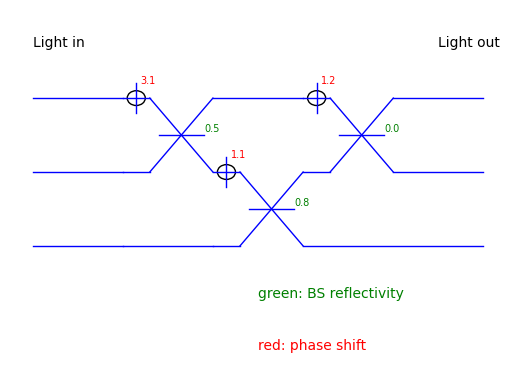

In [29]:
"""
Some notes:
    theta = 0 -> reflective.
    theta = pi/2 -> transparent
    R = 0 -> transparent
    R = 1 -> reflective
"""

I = itf.Interferometer()

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(2, 3, theta=theta_2, phi=phi_2)
BS3 = itf.Beamsplitter(1, 2, theta=theta_3, phi=phi_3)

I.add_BS(BS1)
I.add_BS(BS2)
I.add_BS(BS3)

print(I.BS_list)
I.draw()

In [30]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), np.conjugate(np.transpose(m)) @ m)

R=I.calculate_transformation()

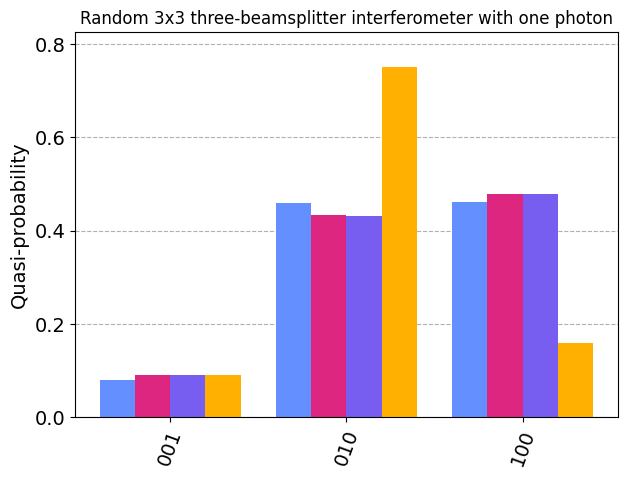

In [31]:
initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    # This is what was going wrong I was putting in incorrect arguments
    # I was iterating over output distributions, not input distributions!
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 three-beamsplitter interferometer with one photon', bar_labels=False)

In [43]:
qc = direct_decomposition(R, 1)
U_circ = Operator(qc).data
U_circ @ [0,0,0,0,0,0,1,0]

array([-3.13745726e-16-3.14330077e-16j, -6.93889390e-18+1.90819582e-16j,
        2.22044605e-16-7.77156117e-16j, -4.29391761e-01+8.24536046e-04j,
        4.60749981e-16+4.23578864e-16j,  4.12933524e-02+1.06297206e-01j,
        6.05480712e-01-6.60311220e-01j,  1.77809156e-16+6.93889390e-16j])